In [59]:
pip install umap-learn

In [60]:
import umap
import sklearn
import pandas as pd
from scipy.spatial import distance_matrix
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot

In [ ]:
#p=pd.read_csv('/content/input.csv')


In [ ]:
centers=pd.read_csv('/content/centers.csv')
centers=centers.drop(columns=['Unnamed: 0'])
centers

In [61]:
dfadnalineages=pd.read_csv("/content/adnalineages.csv")
#dfadnalineages

In [62]:
dfcurrent=pd.read_csv("/content/G25_Current_DNA.csv")
Xcurrent=dfcurrent.drop(columns=['DNA sample ethnicity and id','DNA sample ethnicity','sample id'])

In [63]:
dfancient=pd.read_csv("/content/G25_Ancient_DNA.csv")
Xancient=dfancient.drop(columns=['DNA sample ethnicity and id','DNA sample ethnicity','sample id'])
#Xcurrent

In [65]:
dfsubcon=pd.read_csv("/content/subcontinentg25.csv")
Xsubcon=dfsubcon.drop(columns=['DNA sample ethnicity and id'])
Xsubcon=Xsubcon.drop(columns=['Unnamed: 26','Unnamed: 27'])

In [9]:
frames = [dfcurrent, dfancient]
dfcombined = pd.concat(frames)
Xcombined=dfcombined.drop(columns=['DNA sample ethnicity and id'])
#dfcombined

Ancient Lineage Tool

In [34]:
dfancientpcadna = pd.merge(dfadnalineages,dfancient)
dfancientpcadna

,sample id,Haplogroup 2,Assigned Mutation,Death,Country,Earth Sciences,Region,DNA sample ethnicity and id,DNA sample ethnicity,1,...,16,17,18,19,20,21,22,23,24,25
0,I1781,T,T-M184,3841,Turkmenistan,MIS 1,Central Asia,TKM_Gonur1_BA:I1781,TKM_Gonur1_BA,0.076261,...,0.012729,-0.022817,-0.002534,0.006411,-0.037143,0.000125,-0.016693,-0.006409,-0.011809,0.011735
1,I2085,E,E1b-M215,3899,Turkmenistan,MIS 1,Central Asia,TKM_Gonur1_BA:I2085,TKM_Gonur1_BA,0.081953,...,0.033413,0.011604,-0.005194,0.000126,-0.022386,0.004367,-0.013725,0.011462,-0.015183,0.001916
2,I2927,J,J-M304,4413,Iran,MIS 1,Middle East,IRN_Tepe_Hissar_C:I2927,IRN_Tepe_Hissar_C,0.080814,...,0.036727,0.001304,0.007981,0.006411,-0.024762,0.013851,-0.020155,-0.005423,-0.027594,0.022393
3,I4246,E,E1b-M35,4202,Spain,MIS 1,Western Europe,Iberia_Central_CA_Afr:I4246,Iberia_Central_CA_Afr,-0.051220,...,-0.016309,0.000652,-0.016596,-0.033561,0.003001,-0.011729,-0.018548,0.013064,-0.009399,0.005987
4,I7207,R,R1a-M420,4400,Czech Republic,MIS 1,Eastern Europe,Corded_Ware_CZE_late:I7207,Corded_Ware_CZE_late,0.128620,...,-0.001326,-0.003129,0.000760,0.008170,0.003627,-0.001248,0.000618,0.000493,0.008796,0.001197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,HYR002,E,E1b-M293,2300,Kenya,MIS 1,Sub-Saharan Africa,KEN_HyraxHill_2300BP:HYR002,KEN_HyraxHill_2300BP,-0.284558,...,-0.028109,0.006128,-0.007348,0.000880,0.000375,0.000873,-0.004451,-0.003574,0.004097,-0.009700
1077,MOL001,E,E1b-M293,1500,Kenya,MIS 1,Sub-Saharan Africa,KEN_MoloCave_1500BP:MOL001,KEN_MoloCave_1500BP,-0.355128,...,-0.031954,0.017863,0.012542,-0.002765,-0.004877,0.002246,-0.003586,0.001479,-0.006025,-0.001916
1078,TAU001,E,E1b-M2,1100,Botswana,MIS 1,Sub-Saharan Africa,BWA_Taukome_1100BP:TAU001,BWA_Taukome_1100BP,-0.648792,...,-0.001458,-0.001173,0.042061,-0.025014,-0.006003,-0.001622,-0.002226,0.001602,-0.000723,0.009819
1079,XAR001,E,E1b-V38,1400,Botswana,MIS 1,Sub-Saharan Africa,BWA_Xaro_1400BP:XAR001,BWA_Xaro_1400BP,-0.586189,...,0.001724,0.011474,0.059290,-0.024008,-0.001876,-0.008360,0.002226,0.000246,-0.000964,-0.003712


In [78]:
J2aM410=dfancientpcadna[dfancientpcadna['Assigned Mutation'] =='J2a-M410']
J2aL24=dfancientpcadna[dfancientpcadna['Assigned Mutation']=='J2a-L24']
J2aL26=dfancientpcadna[dfancientpcadna['Assigned Mutation']=='J2a-L26']
J2aL27=dfancientpcadna[dfancientpcadna['Assigned Mutation']=='J2a-L27']
J2aM319=dfancientpcadna[dfancientpcadna['Assigned Mutation'] =='J2a-M319']
J2aM47=dfancientpcadna[dfancientpcadna['Assigned Mutation'] =='J2a-M47']

hapframes=[J2aM410,J2aL24,J2aL26,J2aL27,J2aM47,J2aM319]
J2acombined = pd.concat(hapframes)
#dfcombined

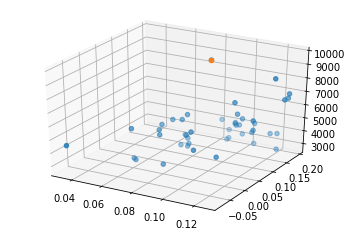

In [84]:
import matplotlib.pyplot as plt
#plt.gcf().set_size_inches((90, 20))    

ax = plt.axes(projection='3d')

ax.scatter3D(J2acombined['1'], J2acombined['2'],J2acombined['Death'])
ax.scatter3D(J2acombined['1'].iloc[3], J2acombined['2'].iloc[3],J2acombined['Death'].iloc[3])

In [66]:
dfancientpcadna.to_csv('dfancientpcadna.csv')

In [40]:
dfancienthpg=dfancientpcadna.groupby(['Assigned Mutation']).mean().reset_index()
dfancienthpg

,Assigned Mutation,Death,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,A00-AF6,7890.000000,-0.607815,0.050776,0.015085,0.026486,-0.001846,0.007809,0.128316,-0.100842,...,-0.001193,0.011474,0.020650,-0.003897,-0.002126,-0.004617,0.001113,-0.000246,-0.000361,-0.006466
1,A1b-L427,2548.000000,-0.286834,0.099522,-0.023759,-0.086887,0.000615,-0.047969,-0.013396,-0.004615,...,-0.022540,0.022948,0.002914,0.004777,-0.001126,0.006489,-0.000742,-0.002095,-0.008435,-0.000718
2,A1b-M13,2146.500000,-0.475780,0.072610,0.001508,-0.013081,0.000616,-0.015617,0.127376,-0.103496,...,-0.016706,0.027967,0.148732,-0.044120,0.002189,-0.014475,0.000247,0.000123,0.000783,-0.003472
3,A1b-M51,1909.000000,-0.641962,0.055854,0.026021,0.034884,0.004616,-0.001116,0.267677,-0.210222,...,-0.020021,0.038072,0.292144,-0.091885,0.006628,-0.033441,-0.001484,0.003204,0.001566,0.003233
4,A1b-M91,7508.000000,-0.563424,0.059409,0.008674,0.025517,-0.000462,-0.006275,0.169443,-0.126687,...,-0.014320,0.026142,0.121367,-0.025454,-0.006378,-0.020090,0.001237,0.000246,-0.001084,-0.000539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,S-B254,1080.000000,-0.037562,-0.262007,-0.204399,0.207367,0.166800,-0.339131,0.000470,0.001385,...,-0.005038,-0.014342,-0.000127,0.000880,-0.019885,-0.001996,-0.008656,-0.008751,-0.003856,-0.004191
148,SM-P399,2490.000000,-0.038700,-0.243727,-0.214582,0.239021,0.168955,-0.393794,0.001645,0.010615,...,-0.001061,-0.000391,0.002534,0.002640,0.009254,-0.000749,0.000866,-0.002711,-0.014701,-0.013292
149,T-M184,6089.666667,0.074744,0.106292,-0.093023,-0.052434,-0.053138,-0.007344,0.008774,-0.009230,...,0.008839,-0.016863,-0.000422,0.005950,-0.020802,0.000707,-0.005358,-0.003328,-0.012411,0.009300
150,T1a-L162,6225.000000,0.095124,0.165241,-0.030762,-0.117065,0.022949,-0.056854,-0.012120,-0.008110,...,0.001118,-0.002850,0.005122,0.005315,0.009737,0.001052,0.006889,-0.000035,-0.007884,-0.000650


In [85]:
hpginput=input('')
point=dfancientpcadna[dfancientpcadna['Assigned Mutation'] ==hpginput]
point

T1a-M70


,sample id,Haplogroup 2,Assigned Mutation,Death,Country,Earth Sciences,Region,DNA sample ethnicity and id,DNA sample ethnicity,1,...,16,17,18,19,20,21,22,23,24,25
336,I2514,T,T1a-M70,4341,Iran,MIS 1,Middle East,IRN_Tepe_Hissar_C:I2514,IRN_Tepe_Hissar_C,0.079676,...,0.027844,-0.008996,0.007095,0.002891,-0.015883,0.010357,-0.013849,-0.007272,-0.024823,0.017483


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


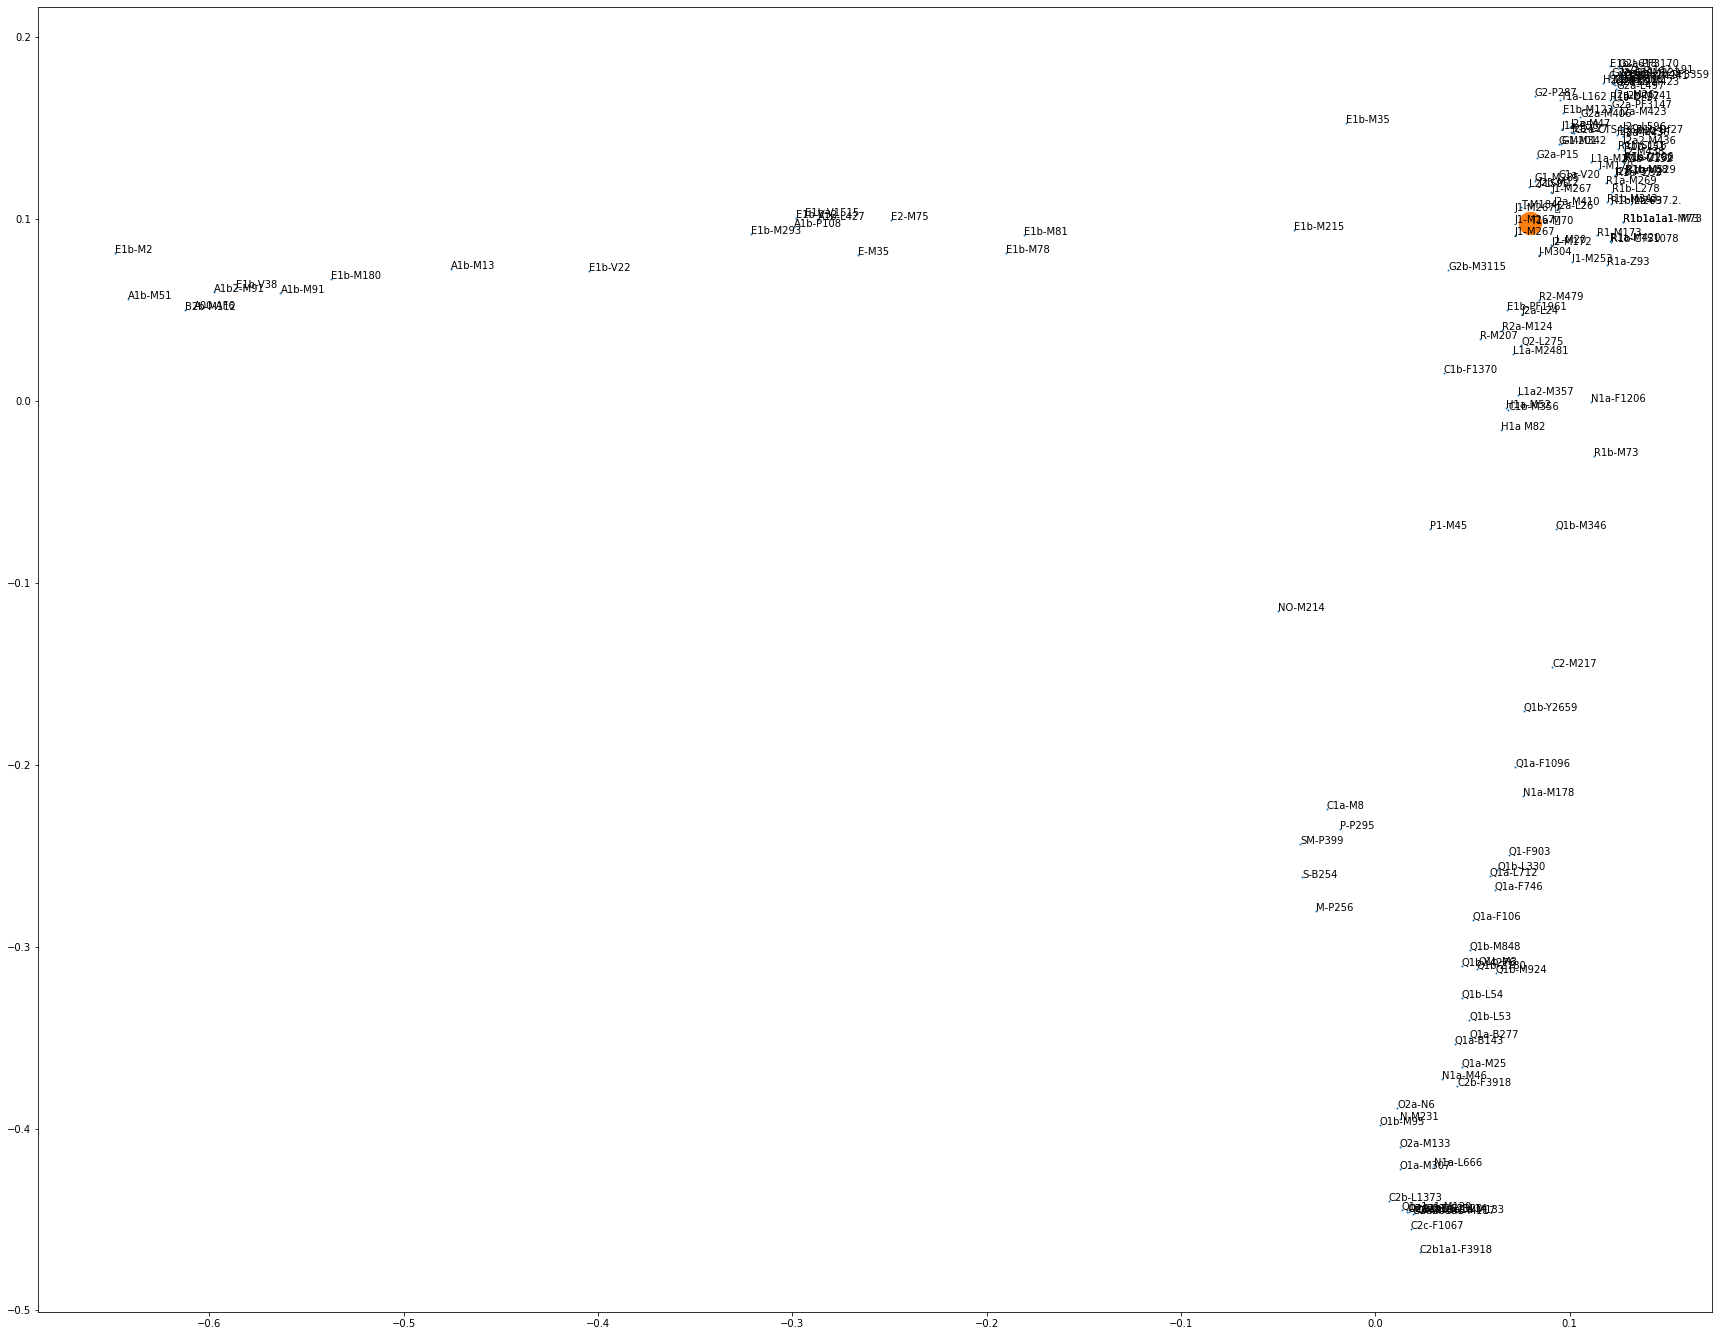

In [89]:
import matplotlib.pyplot as plt
#plt.gcf().set_size_inches((90, 20))    

fig, ax = plt.subplots(figsize=(30, 24))
ax.scatter(dfancienthpg['1'], dfancienthpg['2'],s = 1)
ax.scatter(point['1'],point['2'],s=500)

for i in range(len(dfancienthpg)):
  ax.annotate(dfancienthpg['Assigned Mutation'][i], (dfancienthpg['1'][i], dfancienthpg['2'][i]))

In [ ]:
Lhpgpca=[]
for i in range(len(dfadnalineages)):
  for j in range(len(dfancient)):
    if dfadnalineages['Master ID'][i] in dfancient['DNA sample ethnicity and id'][j]:
      Lhpgpca.append([dfadnalineages['Master ID'][i],dfancient[j]])

Lhpgpca

KeyError: ignored

In [ ]:
dfadnahpgpca = pd.DataFrame(Lhpgpca)
#dfadnahpgpca.to_csv('adnahpgpca.csv')
dfadnahpgpca

,0,1
0,C1,Ethiopian_Jew:GRC12118092
1,C1,Ethiopian_Jew:GRC12118113
2,C1,Ethiopian_Jew:GRC12118119
3,C1,Indonesian_Bali:GRC10041151
4,C1,Indonesian_Bali:GRC10041153
...,...,...
151,R4,Georgian_Imer:IMR4
152,R7,Syrian:Ber13R7
153,R9,Ethiopian_Afar:AFAR9
154,R9,Welsh:WalesDR94


In [ ]:
for i in range(len())

PCA

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


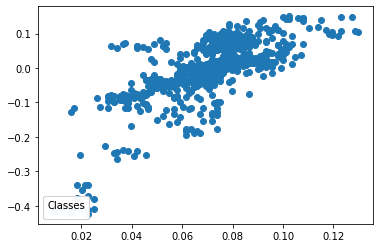

<Figure size 36000x7200 with 0 Axes>

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(Xsubcon.iloc[:,0], Xsubcon.iloc[:,1])
fig=plt.figure(figsize=(500,100))

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


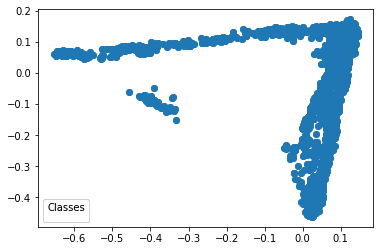

<Figure size 36000x7200 with 0 Axes>

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(Xcombined.iloc[:,0], Xcombined.iloc[:,1])
fig=plt.figure(figsize=(500,100))

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [ ]:
#Approach A is to mark all with one c and the other one with another class-Which will lead to plots marking them in different colors

t-SNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_subcontsne = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(Xsubcon)
X_subcontsne

array([[-10.976257,  15.747041],
       [-10.054186,  17.032047],
       [-10.957252,  16.46069 ],
       ...,
       [-28.062431, -30.073862],
       [-26.531483, -29.604027],
       [-27.12402 , -29.215267]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


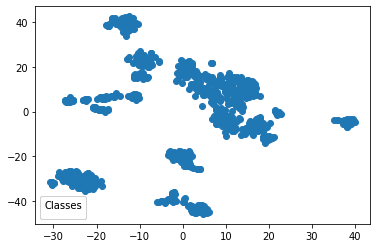

<Figure size 36000x7200 with 0 Axes>

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(X_subcontsne[:,0], X_subcontsne[:,1])
fig=plt.figure(figsize=(500,100))

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_combinedtsne = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(Xcombined)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_combinedtsne = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(Xcombined)
X_combinedtsne

array([[-13.3453665,  43.57606  ],
       [ -7.556997 ,  42.659996 ],
       [-17.195831 ,  45.012337 ],
       ...,
       [-80.19327  ,  -1.2424327],
       [-75.92682  , -14.1241045],
       [-80.226746 ,  -3.6165159]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


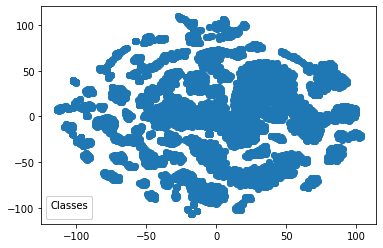

<Figure size 36000x7200 with 0 Axes>

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(X_combinedtsne[:,0], X_combinedtsne[:,1])
fig=plt.figure(figsize=(500,100))

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

Annotation

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90,40))

plt.gcf().set_size_inches((90, 20))    

fig, ax = plt.subplots()
ax.scatter(X_subcontsne[:,0], X_subcontsne[:,1])

for i in range(len(dfsubcon)):
  ax.annotate(dfsubcon['DNA sample ethnicity and id'][i], (X_subcontsne[:,0][i], X_subcontsne[:,1][i]))

Umap

In [ ]:
#Umap plot
n_neighbors=2
min_dist=0.1
n_components=2
metric='euclidean'

fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
usubcon = fit.fit_transform(Xsubcon)
usubcon

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[14.419991 ,  1.6875517],
       [ 9.560268 ,  1.8896335],
       [ 8.541457 ,  2.8332803],
       ...,
       [-9.573466 ,  4.2680597],
       [-9.464432 ,  4.057544 ],
       [-9.246041 ,  4.2282577]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


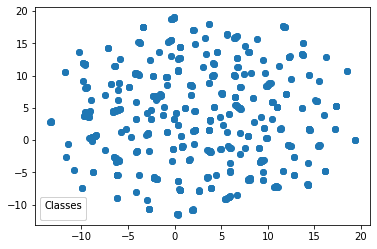

<Figure size 36000x7200 with 0 Axes>

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(usubcon[:,0], usubcon[:,1])
fig=plt.figure(figsize=(500,100))

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [ ]:
#Umap plot
n_neighbors=2
min_dist=0.1
n_components=2
metric='euclidean'

fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
usubcon2 = fit.fit_transform(Xsubcon)
usubcon2

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[15.349142 ,  6.46542  ],
       [ 7.526296 ,  2.4198194],
       [11.668119 , 11.419674 ],
       ...,
       [-6.5277925,  1.0267645],
       [-6.2771297,  1.1370327],
       [-6.463443 ,  1.484159 ]], dtype=float32)

In [ ]:
#Umap plot
n_neighbors=12
min_dist=0.1
n_components=2
metric='euclidean'

fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
ucombined = fit.fit_transform(Xcombined)
ucombined

array([[ 4.89092  , 18.995163 ],
       [ 5.011314 , 19.225101 ],
       [ 5.2146254, 18.549927 ],
       ...,
       [-3.7891045, -3.1997783],
       [-3.2535481, -4.0167017],
       [-3.790426 , -2.9606204]], dtype=float32)

In [ ]:
p=usubcon2[0:10]
test_embedding= fit.transform(p)
test_embedding

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


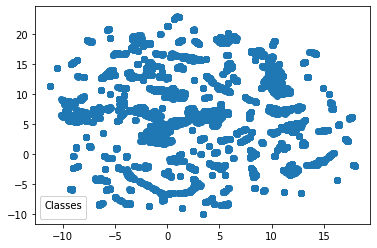

<Figure size 36000x7200 with 0 Axes>

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(ucombined[:,0], ucombined[:,1])
fig=plt.figure(figsize=(500,100))

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

Distance Tool

In [ ]:
def euclidean_distance(p, q):
    n = 25 # dimensions
    return sum([(p[i] - q[i]) ** 2 for i in range(n)]) ** 0.5

In [ ]:
p=Xcombined.iloc[735:740]
p

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
735,0.069432,0.048745,-0.104462,0.029716,-0.069244,0.025100,0.004230,0.002308,-0.022498,-0.021139,...,0.031556,-0.001956,0.007475,0.012821,-0.023386,-0.002870,-0.016693,0.002095,-0.017834,0.011855
736,0.071709,0.039606,-0.099183,0.031977,-0.084016,0.029562,0.001175,0.003461,-0.018612,-0.018224,...,0.033147,-0.014212,0.010769,0.010433,-0.026012,0.000873,-0.016693,-0.003081,-0.017834,0.012454
737,0.072847,0.051792,-0.104462,0.030685,-0.072013,0.035419,0.008930,0.001615,-0.020861,-0.014761,...,0.030230,-0.013560,0.004307,0.008170,-0.034892,-0.002121,-0.013973,-0.000493,-0.008435,0.017962
738,0.073985,0.052808,-0.101068,0.025840,-0.064012,0.027889,0.006345,0.008769,-0.020452,-0.021686,...,0.029965,-0.013430,0.003294,0.006536,-0.029389,-0.002371,-0.015457,0.003697,-0.016629,0.011616
739,0.077400,0.048745,-0.099937,0.027778,-0.075399,0.034304,0.009870,0.001615,-0.027406,-0.020775,...,0.029435,-0.009518,0.002660,0.006411,-0.025262,-0.004367,-0.014467,-0.002835,-0.020364,0.011735


In [ ]:
dfdistances=dfcombined
distances=[]
#Induvidual

for i in range(len(Xcombined)):
  distances.append(euclidean_distance(Xcombined.iloc[i],p.iloc[3]))
dfdistances['distances']=distances

dfdistances=dfdistances.sort_values(by=['distances'])

dfdistances
print(dfdistances['DNA sample ethnicity and id'].iloc[:3])

738    Brahui:HGDP00009
738    Brahui:HGDP00009
746    Brahui:HGDP00033
Name: DNA sample ethnicity and id, dtype: object


In [ ]:
pd.DataFrame(distance_matrix(Xcombined.iloc[0:10], p))

,0,1,2,3,4
0,0.143607,0.150509,0.149934,0.139538,0.138920
1,0.138088,0.146764,0.146978,0.135939,0.134800
2,0.144207,0.150945,0.147189,0.138351,0.139827
3,0.148862,0.156338,0.154066,0.143955,0.144138
4,0.144649,0.152808,0.153302,0.142820,0.142512
5,0.136675,0.144493,0.142897,0.133361,0.133219
6,0.144844,0.152250,0.152268,0.142409,0.142214
7,0.150872,0.157573,0.157037,0.145771,0.146412
8,0.155056,0.165834,0.162308,0.152291,0.151913
9,0.165338,0.174751,0.169691,0.160519,0.161384


In [ ]:

# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
# define the model
model1 = GaussianMixture(n_components=15)
# fit the model
model1.fit(Xcombined)
# assign a cluster to each example
yhat1 = model.predict(Xcombined)
# retrieve unique clusters
clusters1 = unique(yhat1)

In [ ]:

# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

model2 = Birch(threshold=0.01, n_clusters=15)
# fit model and predict clusters
yhat2 = model2.fit_predict(Xcombined)
# retrieve unique clusters
clusters2 = unique(yhat2)

array([5, 5, 5, ..., 0, 0, 0])

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

model = KMeans(n_clusters=15)
# fit the model
model.fit(Xcombined)
# assign a cluster to each example
yhat3 = model.predict(Xcombined)
# retrieve unique clusters
clusters3 = unique(yhat3)

In [ ]:
c=pd.DataFrame(model.means_)
c.to_csv('clustergmm15.csv')

Ancestry

In [ ]:
clusterdist1=[]
for qw in range(15):
  clusterdist1.append(euclidean_distance(c[qw],p.iloc[0]))
tot1=sum(clusterdist1)

clusterdist1=pd.DataFrame(clusterdist1)

KeyError: ignored

In [ ]:
clusterdist1['distances']=clusterdist1['']/tot1

In [ ]:

for qa in range(len(clusterdist1)):
  clusterdist1['percentages']=1-(tot1-clusterdist1['distances'][qa])/tot1

clusterdist1

In [ ]:
import matplotlib.pyplot as plt

labels = centers['component']
explode = (0, 0.0, 0, 0.0)

fig1, ax1 = plt.subplots()
ax1.pie(clusterdist1['percentages'], explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [ ]:
import matplotlib.pyplot as plt

labels = centers['component']
explode = (0, 0.0, 0, 0.0)

fig1, ax1 = plt.subplots()
ax1.pie(clusterdist1['percentages'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [ ]:
1 2
2/3 1/3

1-1/3
1-2/3

1 2 1
1/4 2/4 1/4
1-(4-1)/4
1-(4-2)/4
1-(4-1)/4


1-(tot1-clusterdist1['distances'][qa])/tot1

In [ ]:
import matplotlib.pyplot as plt

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

Hap plot

In [ ]:
dfancienthpg=dfanncient.groupby(['Haplogroup']).mean()
dfancienthpg
#df.groupby(['Animal']).mean()

In [ ]:
haplogroupinput=input('')
haplogroupinput

J2b


'J2b'

In [ ]:
for z1 in range(len()):
  if 

In [ ]:
haplogroupinputpt=

In [ ]:
plt.scatter(dfancienthpg.iloc[:,0],dfancienthpg.iloc[:,1])
plt.scatter(haplogroupinputpt.iloc[:,0],haplogroupinputpt.iloc[:,1])

import matplotlib.pyplot as plt
plt.figure(figsize=(90,40))

plt.gcf().set_size_inches((90, 20))    

fig, ax = plt.subplots()
ax.scatter(X_subcontsne[:,0], X_subcontsne[:,1])

for i in range(len(dfsubcon)):
  ax.annotate(dfsubcon['DNA sample ethnicity and id'][i], (X_subcontsne[:,0][i], X_subcontsne[:,1][i]))